In [1]:
%matplotlib inline

import logging
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import sys
import numpy as np
sns.set_context('talk')

Assumes that the following rsync has happened:

`rsync -av orchids-compute:/data1/urebbapr/MLOC/notebooks/vapor.data.h5 .`

# Investigations 

1. Why did the R2 change so drastically when vapor was filtered
2. Why did pathological predictions show up on January 19 and 20, 2014

In [2]:
F_H5 = 'vapor.data.h5'
vapor_df = pd.read_hdf(F_H5, '/preprocess/test')

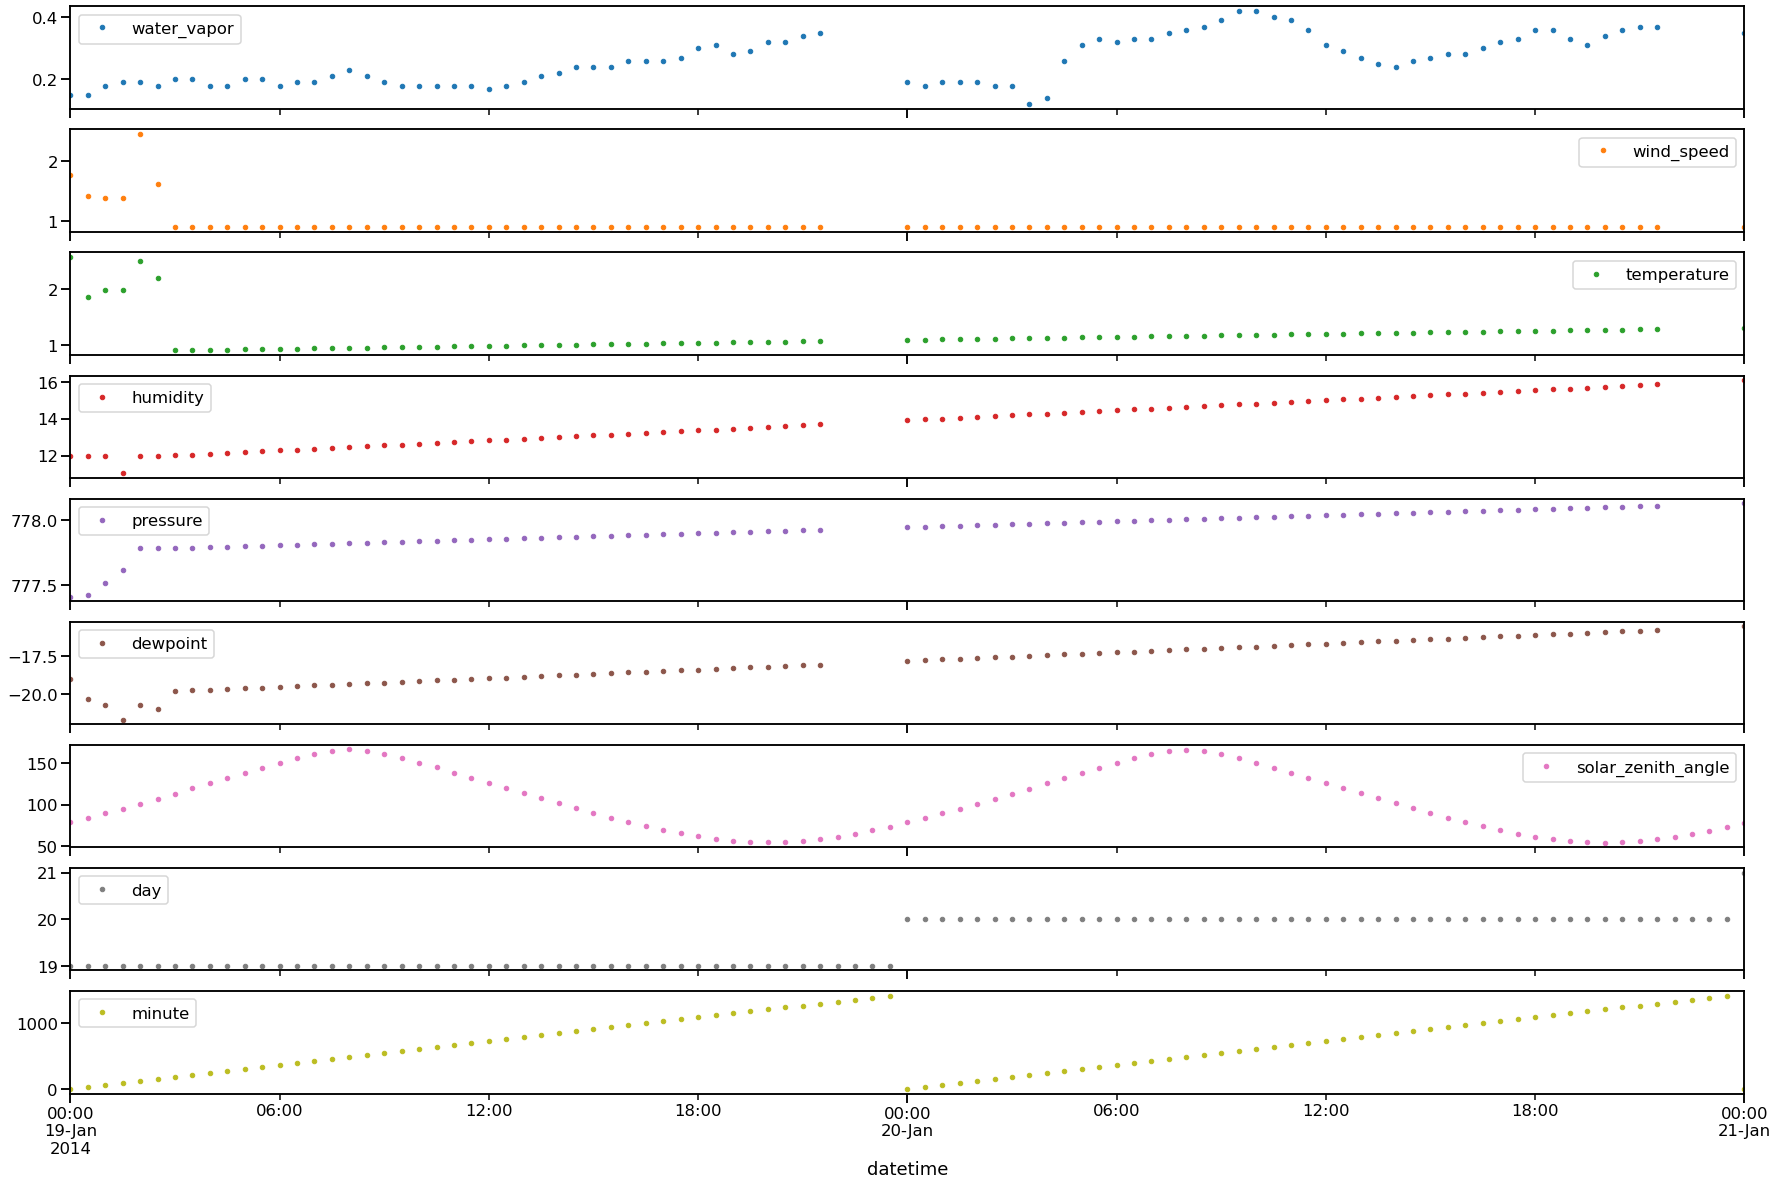

In [20]:
january_mask = (vapor_df.index >= '2014-01-19') & (vapor_df.index <= '2014-01-21')
vapor_df[january_mask].plot(subplots=True, figsize=(30, 20), marker='.', linestyle='none')
plt.savefig('vapor.january.pathological.png')
plt.show()

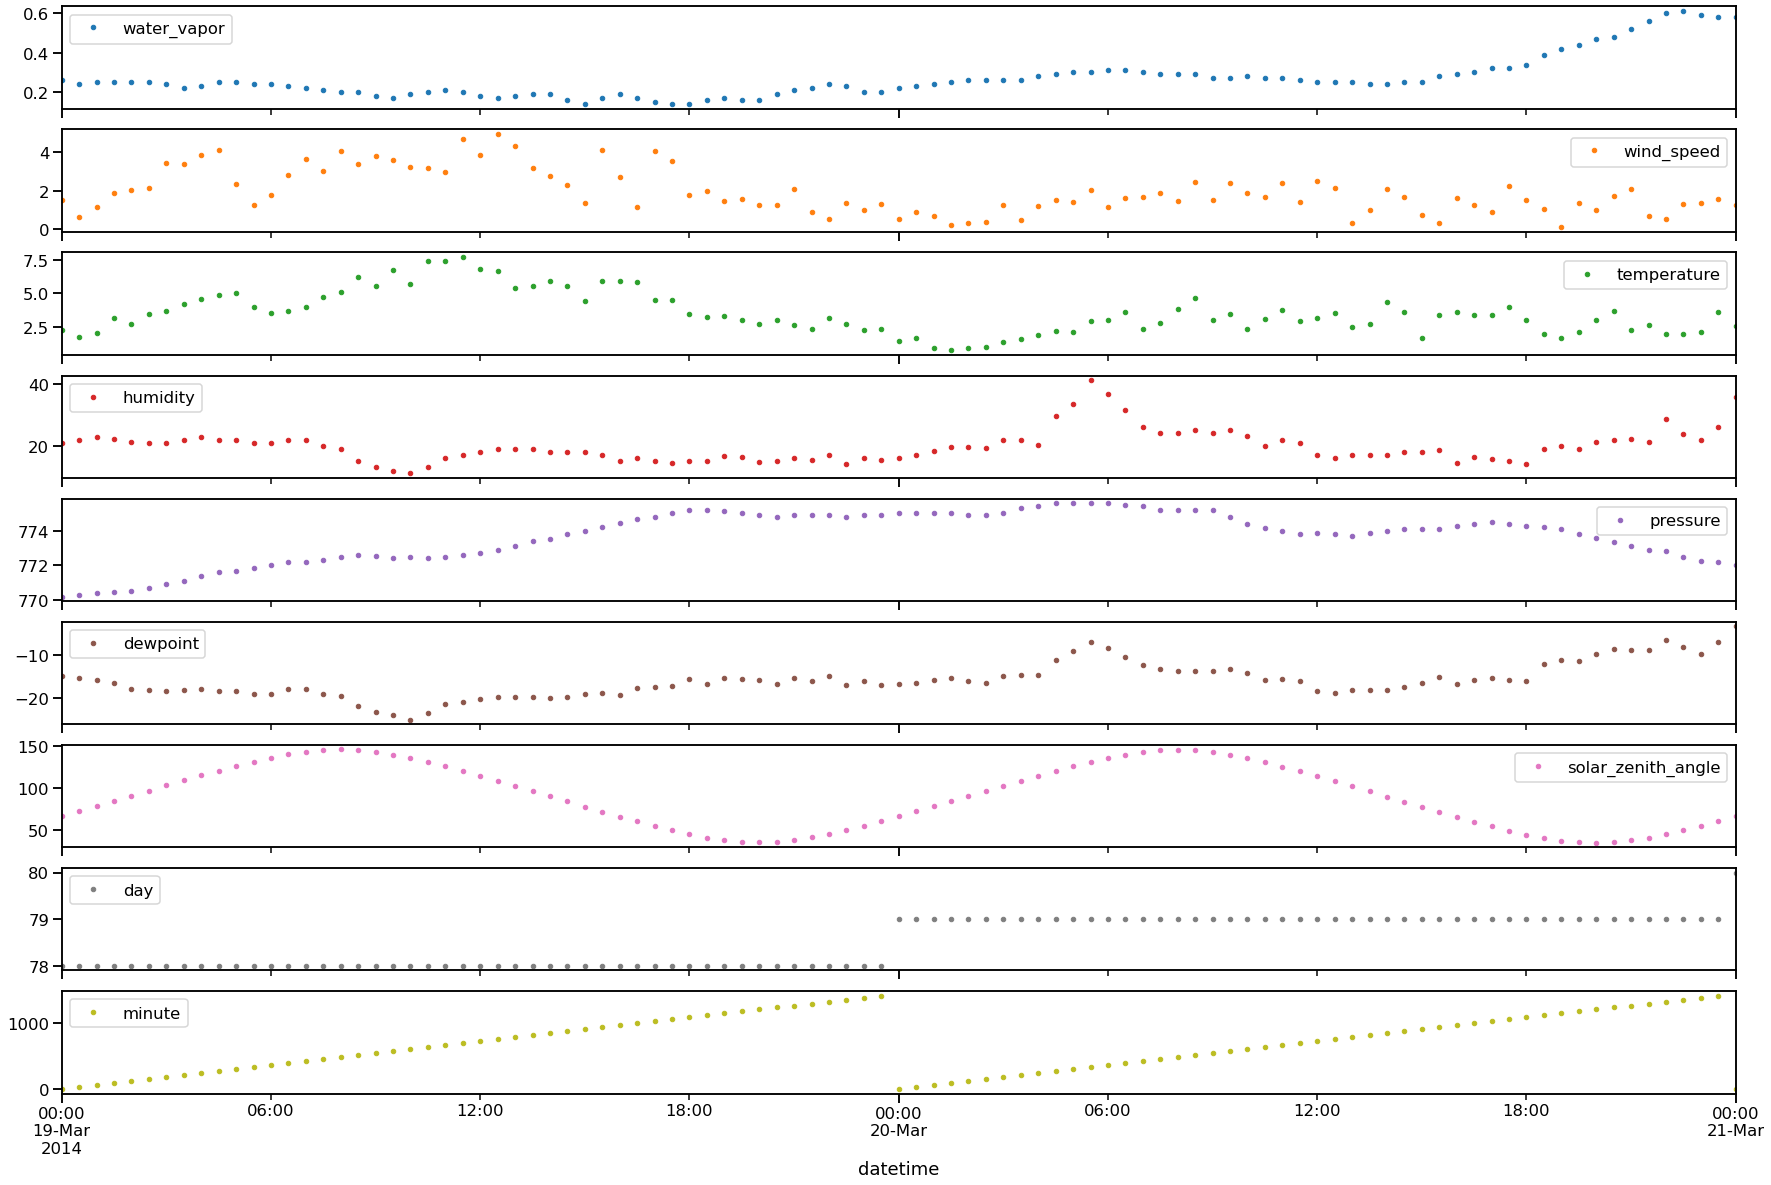

In [21]:
march_mask = (vapor_df.index >= '2014-03-19') & (vapor_df.index <= '2014-03-21')
vapor_df[march_mask].plot(subplots=True, figsize=(30,20), marker='.', linestyle='none')
plt.savefig('vapor.march.normal.png')
plt.show()

# R2 Mystery

In [5]:
vapor_df = pd.read_hdf(F_H5, '/preprocess/test')

In [6]:
vapor_df['water_vapor'].var()

0.21453354077960182

In [7]:
vapor_df.describe()

,water_vapor,wind_speed,temperature,humidity,pressure,dewpoint,solar_zenith_angle,day,minute
count,23789.000000,23789.000000,23789.000000,23789.000000,23789.000000,23789.000000,28601.000000,28601.000000,28601.000000
mean,0.642808,2.502072,5.218342,36.074046,775.083186,-6.137133,88.107029,157.234188,704.892486
std,0.463178,1.917045,3.245571,24.416692,3.930164,8.043476,38.901006,98.241736,415.538335
min,0.010000,0.000000,0.226231,4.000000,759.781568,-36.395703,11.064536,1.000000,0.000000
25%,0.330000,1.100165,2.840758,18.000000,772.805624,-11.556720,56.860917,75.000000,330.000000
50%,0.520000,2.063751,4.586294,28.000000,775.673490,-5.591877,88.599049,149.000000,690.000000
75%,0.790000,3.375760,6.771118,47.400000,777.910403,-0.443025,120.206937,224.000000,1050.000000
max,2.800000,20.687867,29.551508,98.000000,785.507024,14.178836,168.824832,365.000000,1410.000000


In [8]:
humidity_mask = vapor_df['humidity'] <= 80

In [9]:
vapor_df.loc[humidity_mask,'water_vapor'].var()

0.21360740629259947

In [10]:
# np.sum(~humidity_mask)

In [11]:
# np.sum(humidity_mask)

In [12]:
filt_vapor_df = pd.read_hdf(F_H5, '/filtered/preprocess/test')

In [13]:
filt_vapor_df.describe()

,water_vapor,wind_speed,temperature,humidity,pressure,dewpoint,solar_zenith_angle,day,minute
count,18667.000000,18667.000000,18667.000000,18667.000000,18667.000000,18667.000000,18667.000000,18667.000000,18667.000000
mean,0.446227,2.561940,5.315503,33.729949,774.626185,-8.388479,89.942046,157.339690,698.051642
std,0.197414,1.919587,3.249247,24.129916,4.000515,7.085441,38.425247,98.386701,405.701375
min,0.010000,0.000000,0.226231,4.000000,759.781568,-36.395703,11.065004,4.000000,0.000000
25%,0.290000,1.139585,2.939994,16.728000,772.126991,-13.135399,58.041520,83.000000,360.000000
50%,0.440000,2.149905,4.711891,25.784000,775.179889,-7.571785,91.054841,136.000000,690.000000
75%,0.600000,3.457103,6.847920,42.204000,777.537901,-3.134830,121.585755,236.000000,1050.000000
max,0.850000,20.687867,25.135468,98.000000,785.507024,11.025347,168.802072,364.000000,1410.000000


In [14]:
filt_vapor_df['water_vapor'].var()

0.03897224739311251

In [15]:
# filt_vapor_df['humidity'].plot(figsize=(30,10))

In [16]:
# vapor_df['humidity'].plot(figsize=(30,10))